## Introduction

Zhenwei Shi, Zhitao Wei, Zhihe Zhao, Zaiyi Liu - *Foundation Model for Quantitative Imaging Analysis in Breast Cancer*

The notebook below gives an example to users for quantitaive analysis using FMBCMRI foundation model. 



### Quick Start (10 mins!)

In [1]:
### Adding the current directory python path
import sys
sys.path.append('../') # add project root to the python path

### FMBCMRI: Feature extraction

In [2]:
# Load fmbcmri package
from fmbcmri.function import feature_extraction

# The path that stores your data including images and masks.
dataset_path = r'./dataset/DATASET1'

# Pretrained checkpoint file.
ckpt_path = r'./pretrained_checkpoint/breast_MR_checkpoint.pth.tar'

# The path that stores the output of feature_extraction including feature.csv,
out_path = r'./feature_output'

# feature extraction by the loaded pre-trained model
# the imaging feature table will be stored in a specific folder
feat_df = feature_extraction.extraction_main(dataset_path, ckpt_path, out_path)

2024-01-03 16:01:34.761144: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


=> Start loading pretrained weights from ./pretrained_checkpoint/breast_MR_checkpoint.pth.tar
Loading messages: 
 _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['momentum_encoder.cls_token', 'momentum_encoder.pos_embed', 'momentum_encoder.patch_embed.proj.weight', 'momentum_encoder.patch_embed.proj.bias', 'momentum_encoder.blocks.0.norm1.weight', 'momentum_encoder.blocks.0.norm1.bias', 'momentum_encoder.blocks.0.attn.qkv.weight', 'momentum_encoder.blocks.0.attn.qkv.bias', 'momentum_encoder.blocks.0.attn.proj.weight', 'momentum_encoder.blocks.0.attn.proj.bias', 'momentum_encoder.blocks.0.norm2.weight', 'momentum_encoder.blocks.0.norm2.bias', 'momentum_encoder.blocks.0.mlp.fc1.weight', 'momentum_encoder.blocks.0.mlp.fc1.bias', 'momentum_encoder.blocks.0.mlp.fc2.weight', 'momentum_encoder.blocks.0.mlp.fc2.bias', 'momentum_encoder.blocks.1.norm1.weight', 'momentum_encoder.blocks.1.norm1.bias', 'momentum_encoder.blocks.1.attn.qkv.weight', 'momentum_encoder.blo

100%|██████████| 35/35 [00:00<00:00, 77961.04it/s]


=> Reading image and calc feature...


IS2-d0: 100%|██████████| 35/35 [00:20<00:00,  1.71it/s]


=> Saving...
=> PCA...


/home/wzt/miniconda3/envs/fmbcmri/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


=> Processing 
=> Reading mask...


100%|██████████| 35/35 [00:00<00:00, 241448.42it/s]


=> Reading image and calc feature...


IS2-d0: 100%|██████████| 35/35 [00:00<00:00, 176.37it/s]


=> Saving...
=> PCA...


/home/wzt/miniconda3/envs/fmbcmri/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


#### FMBCMRI: Data combination including clinical data and imaging feature
Here is an example if we have already extracted imaging feature based on the pre-trained model. Also, users have related clinical data.


In [3]:
import pandas as pd

# Read clinical data table
df_cd_train = pd.read_csv(r"./data/clinical_data_train.csv")
df_cd_test = pd.read_csv(r"./data/clinical_data_test.csv")
print('Clinical data has the table shape:', df_cd_train.shape,df_cd_test.shape)

# Read imaging data table
df_if_train = pd.read_csv(r"./data/imaging_feature_train.csv")
df_if_test = pd.read_csv(r"./data/imaging_feature_test.csv")
print('Imaging feature has the table shape:', df_if_train.shape,df_if_test.shape)

# Merge the two DataFrames based on the "ID" column 
df_merge_train = df_cd_train .merge(df_if_train , on="ID")
df_merge_test = df_cd_test.merge(df_if_test, on="ID")

# Save the merged table locally
df_merge_train.to_csv(r"./data/merged_table_train.csv", index=False)
df_merge_test.to_csv(r"./data/merged_table_test.csv", index=False)

Clinical data has the table shape: (106, 2) (35, 2)
Imaging feature has the table shape: (106, 17) (35, 17)


#### FMBCMRI: Feature analysis

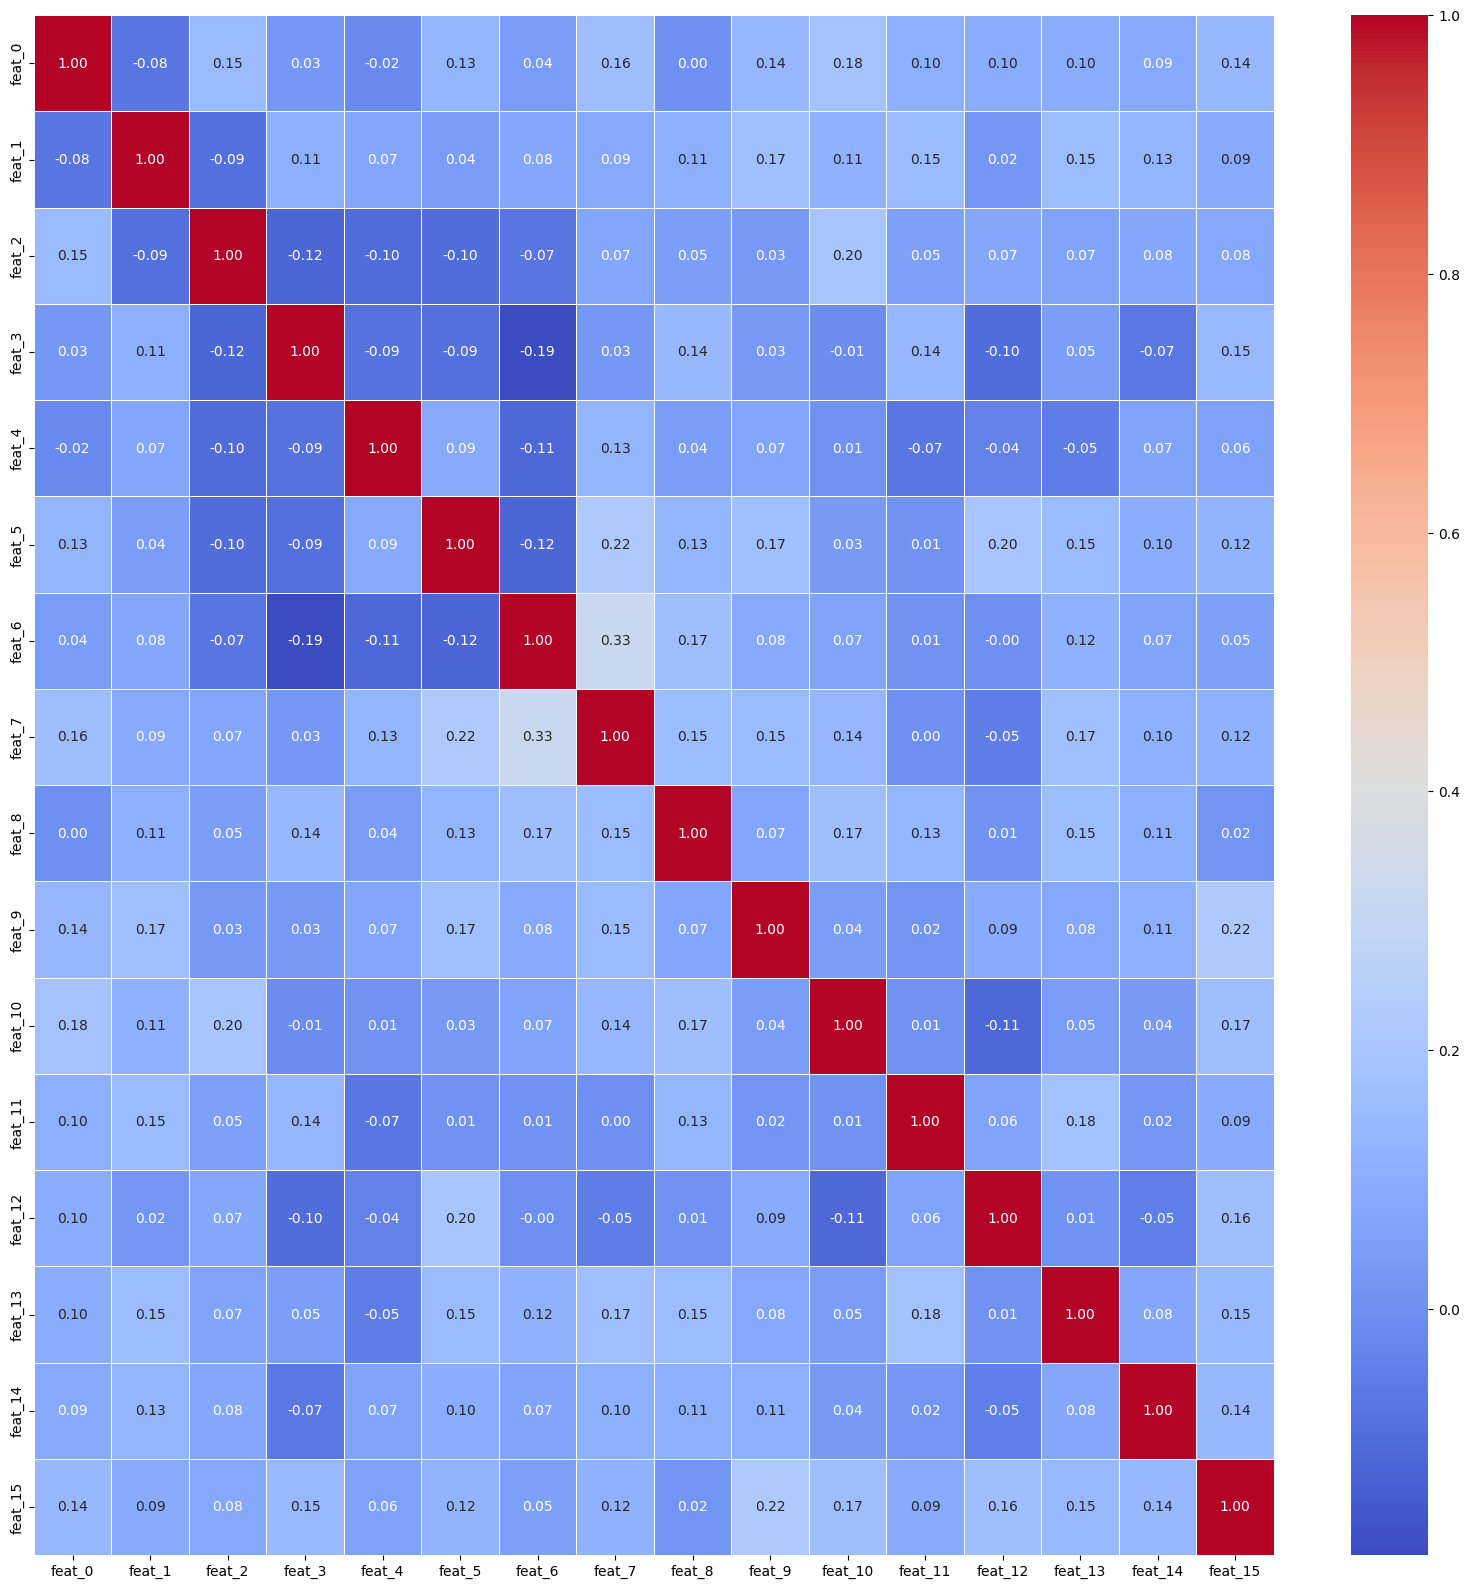

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

imf_list_train = df_if_train.columns[1:] # imf_list: imaging feautre list
df_imf_train = pd.DataFrame(df_merge_train[imf_list_train]) # df_imf: data frame of imaging feature

imf_list_test = df_if_test.columns[1:] # imf_list: imaging feautre list
df_imf_test = pd.DataFrame(df_merge_test[imf_list_test]) # df_imf: data frame of imaging featue

# Calculate the correlation matrix
correlation_matrix_train = df_imf_train.corr(method='spearman') # or method='pearson'
# correlation_matrix_test = df_imf_test.corr(method='spearman') # or method='pearson'

# Create figure plot
plt.figure(figsize=(20, 20))

# Plot the second heatmap (Spearman correlation)
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.savefig(r'./output/feature_correlation_train'+'.eps', format='eps', bbox_inches='tight')

plt.show()

#### FMBCMRI: Model construction and evaluation
The default classifier is multi-variate logistic regression. Note that, users can select other methods (e.g., random forest, SVM). 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Training Metrics:
AUC: 0.9311
Accuracy: 0.8868
Sensitivity: 0.8000
Specificity: 0.9394
PPV: 0.8889
NPV: 0.8857

Test Metrics:
AUC: 0.8768
Accuracy: 0.8571
Sensitivity: 0.6667
Specificity: 0.9565
PPV: 0.8889
NPV: 0.8462


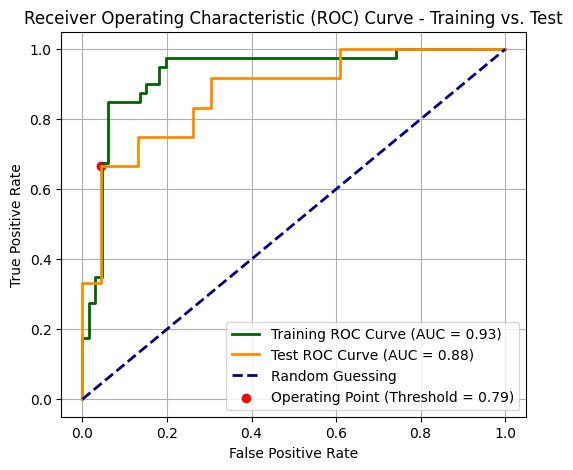

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc,confusion_matrix,accuracy_score

X_train,X_test = df_imf_train,df_imf_test
y_train,y_test = df_merge_train['label'],df_merge_test['label']

# Fit a logistic regression model
model = LogisticRegression()
# model = RandomForestClassifier()

model.fit(X_train, y_train)

# Predict probabilities on training and test sets
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUC for training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Find the threshold corresponding to the maximum Youden's J statistic
youden_values = tpr_test - fpr_test
optimal_threshold_index = np.argmax(youden_values)
optimal_threshold = thresholds[optimal_threshold_index]


# Setting a cutoff/threshold
cutoff = optimal_threshold # You can adjust this threshold
y_test_pred = (y_test_prob >= cutoff).astype(int)

# Make predictions on the training and test datasets
y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
def calculate_metrics(y_true, y_pred, y_prob):
    auc_score = roc_auc_score(y_true, y_prob)
    accuracy = accuracy_score(y_true, y_pred)
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    
    return auc_score, accuracy, sensitivity, specificity, ppv, npv

# Calculate metrics for training and test datasets
train_metrics = calculate_metrics(y_train, y_train_pred, y_train_prob)
test_metrics = calculate_metrics(y_test, y_test_pred, y_test_prob)

# Print the metrics
print("Training Metrics:")
print(f"AUC: {train_metrics[0]:.4f}")
print(f"Accuracy: {train_metrics[1]:.4f}")
print(f"Sensitivity: {train_metrics[2]:.4f}")
print(f"Specificity: {train_metrics[3]:.4f}")
print(f"PPV: {train_metrics[4]:.4f}")
print(f"NPV: {train_metrics[5]:.4f}")
print("\nTest Metrics:")
print(f"AUC: {test_metrics[0]:.4f}")
print(f"Accuracy: {test_metrics[1]:.4f}")
print(f"Sensitivity: {test_metrics[2]:.4f}")
print(f"Specificity: {test_metrics[3]:.4f}")
print(f"PPV: {test_metrics[4]:.4f}")
print(f"NPV: {test_metrics[5]:.4f}")

# Plot ROC curves for training and test sets
plt.figure(figsize=(6, 5))
plt.plot(fpr_train, tpr_train, color='darkgreen', lw=2, label=f'Training ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

# Highlight the operating point
plt.scatter(fpr_test[optimal_threshold_index], tpr_test[optimal_threshold_index], color='red', marker='o', label=f'Operating Point (Threshold = {optimal_threshold:.2f})')

# Additional styling
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Training vs. Test')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot as an EPS file
plt.savefig(r'./output/ROC.eps', format='eps', bbox_inches='tight')
plt.show()


##### Comfusion matrix calculation

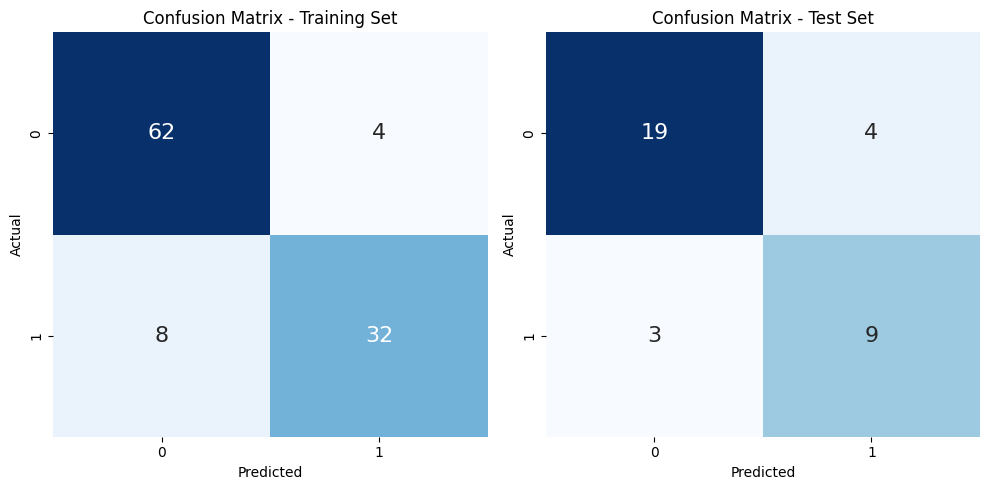

In [7]:
# Predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Training set
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16}, ax=axes[0])
axes[0].set_title('Confusion Matrix - Training Set')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Test set
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16}, ax=axes[1])
axes[1].set_title('Confusion Matrix - Test Set')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.savefig(r'./output/Confusion_matrix.eps', format='eps', bbox_inches='tight')
plt.show()

#### Decision analysis curve

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


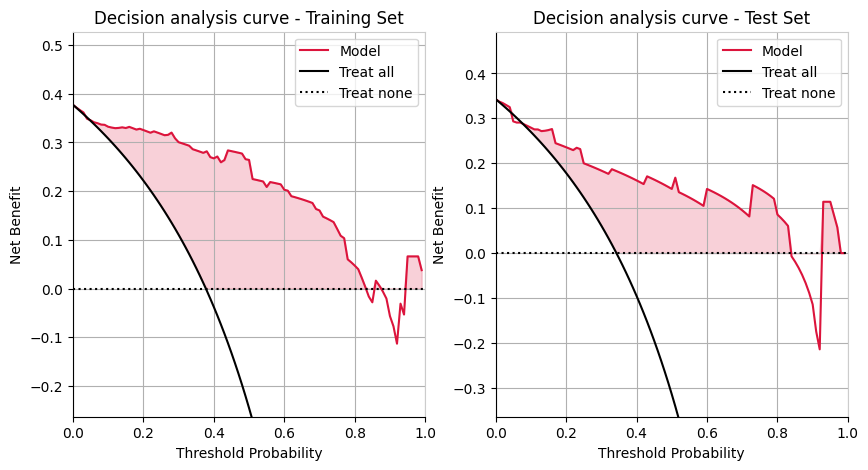

In [8]:
from sklearn.metrics import confusion_matrix

def calculate_net_benefit_model(thresh_group, y_pred_score, y_label):
    net_benefit_model = np.array([])
    for thresh in thresh_group:
        y_pred_label = y_pred_score > thresh
        tn, fp, fn, tp = confusion_matrix(y_label, y_pred_label).ravel()
        n = len(y_label)
        net_benefit = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_benefit_model = np.append(net_benefit_model, net_benefit)
    return net_benefit_model
def calculate_net_benefit_all(thresh_group, y_label):
    net_benefit_all = np.array([])
    tn, fp, fn, tp = confusion_matrix(y_label, y_label).ravel()
    total = tp + tn
    for thresh in thresh_group:
        net_benefit = (tp / total) - (tn / total) * (thresh / (1 - thresh))
        net_benefit_all = np.append(net_benefit_all, net_benefit)
    return net_benefit_all
def plot_DCA(ax, thresh_group, net_benefit_model, net_benefit_all):
    #Plot
    ax.plot(thresh_group, net_benefit_model, color = 'crimson', label = 'Model')
    ax.plot(thresh_group, net_benefit_all, color = 'black',label = 'Treat all')
    ax.plot((0, 1), (0, 0), color = 'black', linestyle = ':', label = 'Treat none')
    #Fill，显示出模型较于treat all和treat none好的部分
    y2 = np.maximum(net_benefit_all, 0)
    y1 = np.maximum(net_benefit_model, y2)
    ax.fill_between(thresh_group, y1, y2, color = 'crimson', alpha = 0.2)
    #Figure Configuration
    ax.set_xlim(0,1)
    ax.set_ylim(net_benefit_model.min() - 0.15, net_benefit_model.max() + 0.15)#adjustify the y axis limitation
    ax.set_xlabel(
        xlabel = 'Threshold Probability', 
        )
    ax.set_ylabel(
        ylabel = 'Net Benefit', 
        )
    ax.grid('major')
    ax.spines['right'].set_color((0.8, 0.8, 0.8))
    ax.spines['top'].set_color((0.8, 0.8, 0.8))
    ax.legend(loc = 'upper right')
    return ax

thresh_group = np.arange(0,1,0.01)
net_benefit_model_train = calculate_net_benefit_model(thresh_group, y_train_prob, y_train)
net_benefit_all_train = calculate_net_benefit_all(thresh_group, y_train)

net_benefit_model_test = calculate_net_benefit_model(thresh_group, y_test_prob, y_test)
net_benefit_all_test = calculate_net_benefit_all(thresh_group, y_test)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1 = plot_DCA(axes[0], thresh_group, net_benefit_model_train, net_benefit_all_train)
axes[0].set_title('Decision analysis curve - Training Set')

ax2 = plot_DCA(axes[1], thresh_group, net_benefit_model_test, net_benefit_all_test)
axes[1].set_title('Decision analysis curve - Test Set')
# fig.savefig('fig1.png', dpi = 300)
plt.savefig(r'./output/DSC.eps', format='eps', bbox_inches='tight')
plt.show()

#### FMBCMRI: Model interpretation 
SHAP (SHapley Additive exPlanations) values are a powerful tool for interpreting machine learning models. They provide a way to fairly distribute the contribution of each feature to the prediction made by the model. Here's a general guide on how to use SHAP values to interpret a machine learning model.

Using 106 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/35 [00:00<?, ?it/s]

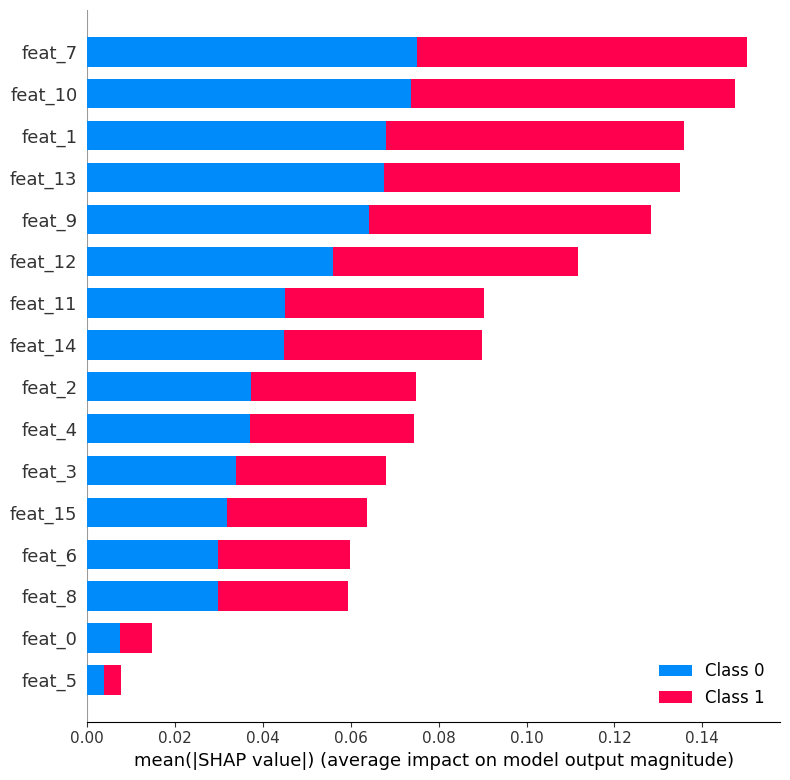

In [9]:
import shap

# Use shap values to explain the model's predictions
explainer = shap.KernelExplainer(model.predict_proba, X_train)

# Calculate shap values
shap_values = explainer.shap_values(X_test)

# plot shap value for each feature
shap.summary_plot(shap_values, X_test, feature_names=df_if_train.columns[1:],show=False)

# Save the plot as an EPS file
plt.savefig(r'./output/shap_summary_plot_1.eps', format='eps', dpi=1200,bbox_inches='tight')

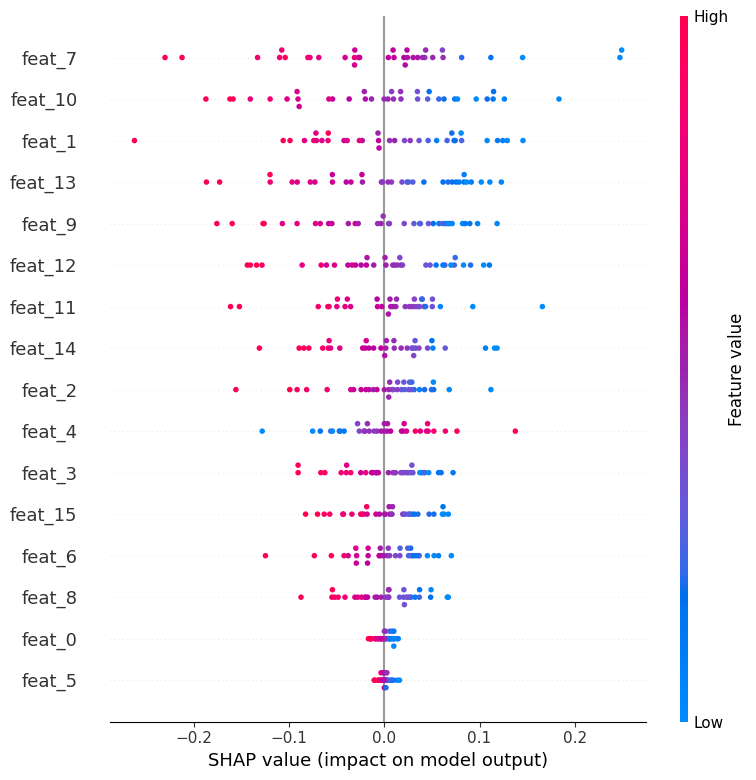

In [10]:
shap.summary_plot(shap_values[0], X_test,feature_names=df_if_train.columns[1:],show=False)
plt.savefig(r'./output/shap_summary_plot_2.eps', format='eps', dpi=600,bbox_inches='tight')

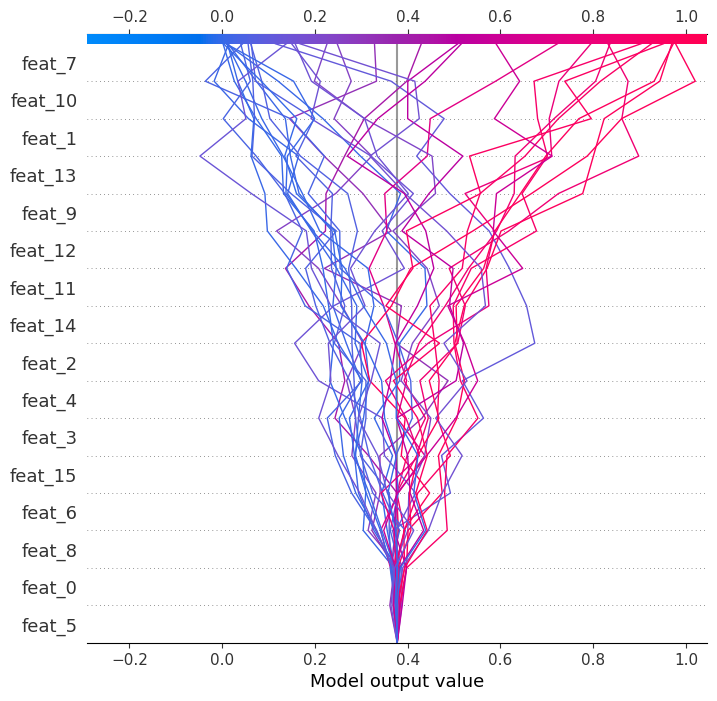

In [11]:
# Create a decision plot for a specific instance
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test, feature_names=list(df_if_train.columns[1:]),show = False)

plt.savefig(r'./output/shap_decision_plot.eps', format='eps', dpi=600,bbox_inches='tight')

##### t-SNE (t-distributed Stochastic Neighbor Embedding) and UMAP (Uniform Manifold Approximation and Projection) are dimensionality reduction techniques that can be used to visualize high-dimensional data in a lower-dimensional space. Here's a general guide on how to use t-SNE or UMAP to plot features

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


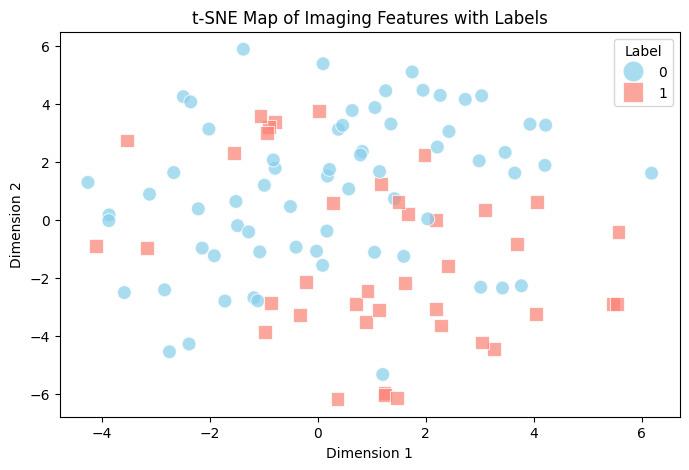

In [12]:
from sklearn.manifold import TSNE

# X = np.array(df['Immu_TRscore']).reshape(-1,1)
X = df_imf_train
y = df_merge_train['label']

# Transform the data using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for visualization
df_tsne = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Label'] = y

# Set a custom color palette
palette = {0: 'skyblue', 1: 'salmon'}

# Plot the t-SNE map with enhanced aesthetics
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Label', data=df_tsne, palette=palette, style='Label', markers={0: 'o', 1: 's'}, s=100, alpha=0.7)
plt.title('t-SNE Map of Imaging Features with Labels')
plt.legend(title='Label', loc='upper right', markerscale=1.5)
# Save the plot as an EPS file
plt.savefig(r'./output/TSNE.eps', format='eps', bbox_inches='tight')
plt.show()

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.


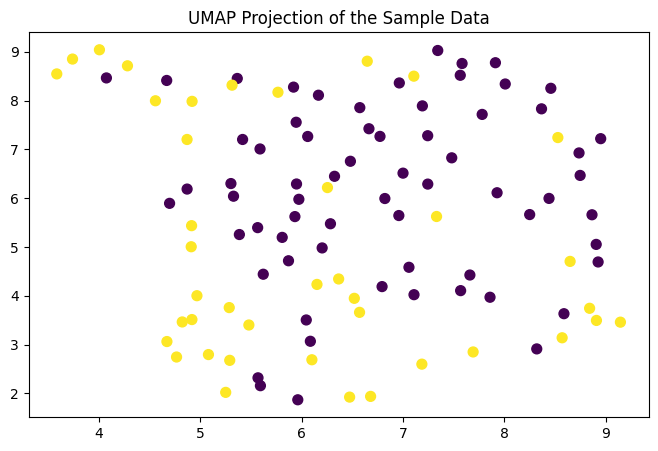

In [13]:
import umap

# Create a sample DataFrame with 5 feature columns and label

# Separate features and labels
X = df_imf_train
y = df_merge_train['label']

# Initialize UMAP
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=42)

# Fit and transform the data using UMAP
embedding = reducer.fit_transform(X)
plt.figure(figsize=(8, 5))
# Visualize the results, coloring points based on labels
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis', s=50)
plt.title('UMAP Projection of the Sample Data')
plt.savefig(r'./output/UMAP.eps', format='eps', bbox_inches='tight')
plt.show()
